In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 


# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list the files in the input directory

from subprocess import check_output
print(check_output(["ls", "../input"]).decode("utf8"))

# Any results you write to the current directory are saved as output.

data-testing-svm
data-training-svm



In [2]:
import pandas as pd
import numpy as np
import seaborn as sns

import matplotlib.pyplot as plt

%matplotlib inline

In [3]:
df = pd.read_csv('../input/data-training-svm/Data_Training-SVM.csv')
df.head()

,Customer ID,Age,Income,Education,Occupation,Income.1,Average Balance,Appraisal,Industri,Pelunasan Kredit
0,1234561427,1,2,4,5,4,3,3,2,1
1,1234561518,5,2,1,5,3,3,5,3,0
2,1234561282,5,4,5,5,3,4,4,3,1
3,1234561064,3,2,3,5,1,1,5,3,0
4,1234561043,2,4,2,3,2,2,2,4,1


In [4]:
df.corr()

,Customer ID,Age,Income,Education,Occupation,Income.1,Average Balance,Appraisal,Industri,Pelunasan Kredit
Customer ID,1.000000,0.019227,-0.007329,-0.006496,-0.058963,-0.082072,0.059576,-0.030396,-0.019679,0.007885
Age,0.019227,1.000000,-0.026969,0.003745,0.070271,0.007013,-0.050081,-0.009393,-0.009680,-0.018199
Income,-0.007329,-0.026969,1.000000,-0.037942,-0.016760,-0.055251,0.088038,0.041757,-0.053743,0.015688
Education,-0.006496,0.003745,-0.037942,1.000000,0.005654,-0.024891,-0.022577,0.024073,0.036056,0.004375
Occupation,-0.058963,0.070271,-0.016760,0.005654,1.000000,-0.010597,-0.059976,0.044575,0.012785,0.012857
Income.1,-0.082072,0.007013,-0.055251,-0.024891,-0.010597,1.000000,0.012960,-0.040526,-0.018684,0.013256
Average Balance,0.059576,-0.050081,0.088038,-0.022577,-0.059976,0.012960,1.000000,0.014198,0.062342,0.090223
Appraisal,-0.030396,-0.009393,0.041757,0.024073,0.044575,-0.040526,0.014198,1.000000,-0.040610,0.004751
Industri,-0.019679,-0.009680,-0.053743,0.036056,0.012785,-0.018684,0.062342,-0.040610,1.000000,0.074051
Pelunasan Kredit,0.007885,-0.018199,0.015688,0.004375,0.012857,0.013256,0.090223,0.004751,0.074051,1.000000


In [5]:
df.isnull().sum()

Customer ID         0
Age                 0
Income              0
Education           0
Occupation          0
Income.1            0
Average Balance     0
Appraisal           0
Industri            0
Pelunasan Kredit    0
dtype: int64

In [6]:
df.shape

(699, 10)

In [7]:
X=df.iloc[:, :-1]
X.head()

,Customer ID,Age,Income,Education,Occupation,Income.1,Average Balance,Appraisal,Industri
0,1234561427,1,2,4,5,4,3,3,2
1,1234561518,5,2,1,5,3,3,5,3
2,1234561282,5,4,5,5,3,4,4,3
3,1234561064,3,2,3,5,1,1,5,3
4,1234561043,2,4,2,3,2,2,2,4


In [8]:
from sklearn.preprocessing import LabelEncoder
y=df.iloc[:,-1]

# Encode label category
# male -> 1
# female -> 0

gender_encoder = LabelEncoder()
y = gender_encoder.fit_transform(y)
y

array([1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0,
       0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1,
       0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1,
       1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0,
       0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0,
       1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1,
       1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1,
       1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1,
       1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0,
       0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0,
       0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0,

In [9]:
# Scale the data to be between -1 and 1
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X)
X = scaler.transform(X)

In [10]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

In [11]:
from sklearn.svm import SVC
from sklearn import metrics
svc=SVC() #Default hyperparameters
svc.fit(X_train,y_train)
y_pred=svc.predict(X_test)
print('Accuracy Score:')
print(metrics.accuracy_score(y_test,y_pred))

Accuracy Score:
0.5071428571428571


In [12]:
svc=SVC(kernel='linear')
svc.fit(X_train,y_train)
y_pred=svc.predict(X_test)
print('Accuracy Score:')
print(metrics.accuracy_score(y_test,y_pred))

Accuracy Score:
0.4857142857142857


In [13]:
svc=SVC(kernel='rbf')
svc.fit(X_train,y_train)
y_pred=svc.predict(X_test)
print('Accuracy Score:')
print(metrics.accuracy_score(y_test,y_pred))

Accuracy Score:
0.5071428571428571


In [14]:
svc=SVC(kernel='poly')
svc.fit(X_train,y_train)
y_pred=svc.predict(X_test)
print('Accuracy Score:')
print(metrics.accuracy_score(y_test,y_pred))

Accuracy Score:
0.4857142857142857


In [15]:
from sklearn.model_selection import cross_val_score

svc=SVC(kernel='linear')
scores = cross_val_score(svc, X, y, cv=10, scoring='accuracy') #cv is cross validation
print(scores)

[0.5        0.54285714 0.47142857 0.54285714 0.47142857 0.51428571
 0.52857143 0.47142857 0.47142857 0.47826087]


In [16]:
print(scores.mean())

0.4992546583850932


In [17]:
from sklearn.model_selection import cross_val_score
svc=SVC(kernel='poly')
scores = cross_val_score(svc, X, y, cv=10, scoring='accuracy') #cv is cross validation
print(scores)

[0.52857143 0.51428571 0.52857143 0.54285714 0.5        0.51428571
 0.51428571 0.42857143 0.52857143 0.49275362]


In [18]:
print(scores.mean())

0.5092753623188406


In [19]:
C_range=list(range(1,26))
acc_score=[]
for c in C_range:
    svc = SVC(kernel='linear', C=c)
    scores = cross_val_score(svc, X, y, cv=10, scoring='accuracy')
    acc_score.append(scores.mean())
print(acc_score)    
    

[0.4992546583850932, 0.5006832298136646, 0.5021118012422361, 0.5021118012422361, 0.5021118012422361, 0.5021118012422361, 0.5021118012422361, 0.5021118012422361, 0.5021118012422361, 0.5021118012422361, 0.5021118012422361, 0.5021118012422361, 0.5021118012422361, 0.5021118012422361, 0.5021118012422361, 0.5006832298136646, 0.5021118012422361, 0.5021118012422361, 0.5035403726708074, 0.5021118012422361, 0.5035403726708074, 0.5035403726708074, 0.5035403726708074, 0.5035403726708074, 0.5035403726708074]


Text(0, 0.5, 'Cross-Validated Accuracy')

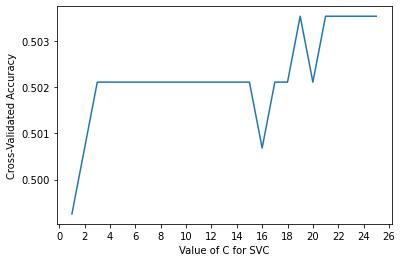

In [20]:
import matplotlib.pyplot as plt
%matplotlib inline


C_values=list(range(1,26))
# plot the value of C for SVM (x-axis) versus the cross-validated accuracy (y-axis)
plt.plot(C_values,acc_score)
plt.xticks(np.arange(0,27,2))
plt.xlabel('Value of C for SVC')
plt.ylabel('Cross-Validated Accuracy')

In [21]:
C_range=list(np.arange(0.1,6,0.1))
acc_score=[]
for c in C_range:
    svc = SVC(kernel='linear', C=c)
    scores = cross_val_score(svc, X, y, cv=10, scoring='accuracy')
    acc_score.append(scores.mean())
print(acc_score)  

[0.510703933747412, 0.4992546583850932, 0.5007039337474121, 0.4992546583850932, 0.4992546583850932, 0.4992546583850932, 0.49782608695652175, 0.49782608695652175, 0.49782608695652175, 0.4992546583850932, 0.4992546583850932, 0.5006832298136646, 0.4992546583850932, 0.49782608695652175, 0.49782608695652175, 0.49639751552795036, 0.4949689440993789, 0.49782608695652175, 0.5006832298136646, 0.5006832298136646, 0.5006832298136646, 0.5006832298136646, 0.5006832298136646, 0.5006832298136646, 0.5006832298136646, 0.5021118012422361, 0.5006832298136646, 0.5021118012422361, 0.5021118012422361, 0.5021118012422361, 0.5021118012422361, 0.5021118012422361, 0.5021118012422361, 0.5021118012422361, 0.5021118012422361, 0.5021118012422361, 0.5021118012422361, 0.5021118012422361, 0.5021118012422361, 0.5021118012422361, 0.5021118012422361, 0.5021118012422361, 0.5021118012422361, 0.5021118012422361, 0.5021118012422361, 0.5021118012422361, 0.5006832298136646, 0.5021118012422361, 0.5021118012422361, 0.50211180124

Text(0, 0.5, 'Cross-Validated Accuracy')

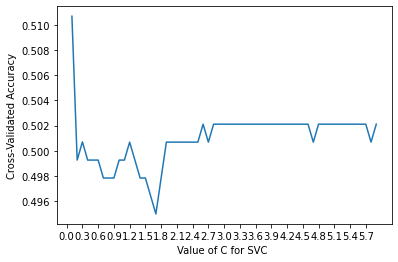

In [22]:
import matplotlib.pyplot as plt
%matplotlib inline

C_values=list(np.arange(0.1,6,0.1))
# plot the value of C for SVM (x-axis) versus the cross-validated accuracy (y-axis)
plt.plot(C_values,acc_score)
plt.xticks(np.arange(0.0,6,0.3))
plt.xlabel('Value of C for SVC ')
plt.ylabel('Cross-Validated Accuracy')

In [23]:
gamma_range=[0.0001,0.001,0.01,0.1,1,10,100]
acc_score=[]
for g in gamma_range:
    svc = SVC(kernel='rbf', gamma=g)
    scores = cross_val_score(svc, X, y, cv=10, scoring='accuracy')
    acc_score.append(scores.mean())
print(acc_score)   

[0.5321946169772256, 0.5321946169772256, 0.5279089026915113, 0.5207867494824017, 0.5078674948240165, 0.5321946169772256, 0.5321946169772256]


Text(0, 0.5, 'Cross-Validated Accuracy')

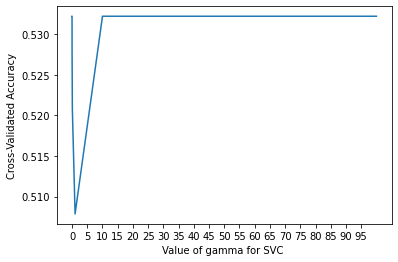

In [24]:
import matplotlib.pyplot as plt
%matplotlib inline

gamma_range=[0.0001,0.001,0.01,0.1,1,10,100]

# plot the value of C for SVM (x-axis) versus the cross-validated accuracy (y-axis)
plt.plot(gamma_range,acc_score)
plt.xlabel('Value of gamma for SVC ')
plt.xticks(np.arange(0.0001,100,5))
plt.ylabel('Cross-Validated Accuracy')

In [25]:
gamma_range=[0.0001,0.001,0.01,0.1]
acc_score=[]
for g in gamma_range:
    svc = SVC(kernel='rbf', gamma=g)
    scores = cross_val_score(svc, X, y, cv=10, scoring='accuracy')
    acc_score.append(scores.mean())
print(acc_score)    

[0.5321946169772256, 0.5321946169772256, 0.5279089026915113, 0.5207867494824017]


Text(0, 0.5, 'Cross-Validated Accuracy')

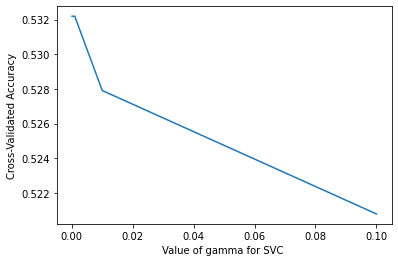

In [26]:
import matplotlib.pyplot as plt
%matplotlib inline

gamma_range=[0.0001,0.001,0.01,0.1]

# plot the value of C for SVM (x-axis) versus the cross-validated accuracy (y-axis)
plt.plot(gamma_range,acc_score)
plt.xlabel('Value of gamma for SVC ')
plt.ylabel('Cross-Validated Accuracy')

In [27]:
gamma_range=[0.01,0.02,0.03,0.04,0.05]
acc_score=[]
for g in gamma_range:
    svc = SVC(kernel='rbf', gamma=g)
    scores = cross_val_score(svc, X, y, cv=10, scoring='accuracy')
    acc_score.append(scores.mean())
print(acc_score)    

[0.5279089026915113, 0.5036024844720497, 0.5093581780538302, 0.5121946169772256, 0.5207867494824016]


Text(0, 0.5, 'Cross-Validated Accuracy')

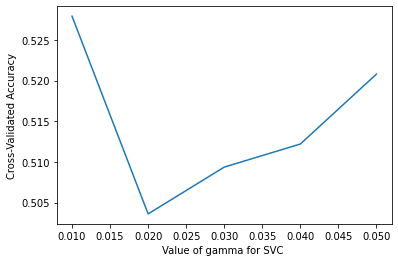

In [28]:
import matplotlib.pyplot as plt
%matplotlib inline

gamma_range=[0.01,0.02,0.03,0.04,0.05]

# plot the value of C for SVM (x-axis) versus the cross-validated accuracy (y-axis)
plt.plot(gamma_range,acc_score)
plt.xlabel('Value of gamma for SVC ')
plt.ylabel('Cross-Validated Accuracy')

In [29]:
degree=[2,3,4,5,6]
acc_score=[]
for d in degree:
    svc = SVC(kernel='poly', degree=d)
    scores = cross_val_score(svc, X, y, cv=10, scoring='accuracy')
    acc_score.append(scores.mean())
print(acc_score)    

[0.550848861283644, 0.5092753623188406, 0.5193581780538301, 0.5221739130434782, 0.5193581780538301]


Text(0, 0.5, 'Cross-Validated Accuracy')

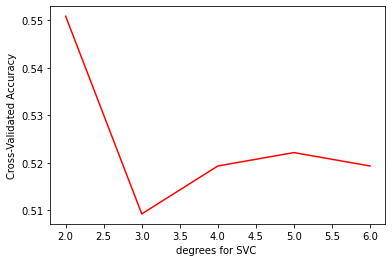

In [30]:
import matplotlib.pyplot as plt
%matplotlib inline

degree=[2,3,4,5,6]

# plot the value of C for SVM (x-axis) versus the cross-validated accuracy (y-axis)
plt.plot(degree,acc_score,color='r')
plt.xlabel('degrees for SVC ')
plt.ylabel('Cross-Validated Accuracy')

In [31]:
from sklearn.svm import SVC
svc= SVC(kernel='linear',C=0.1)
svc.fit(X_train,y_train)
y_predict=svc.predict(X_test)
accuracy_score= metrics.accuracy_score(y_test,y_predict)
print(accuracy_score)

0.4857142857142857


In [32]:
from sklearn.model_selection import cross_val_score
svc=SVC(kernel='linear',C=0.1)
scores = cross_val_score(svc, X, y, cv=10, scoring='accuracy')
print(scores)

[0.5        0.54285714 0.54285714 0.52857143 0.5        0.52857143
 0.51428571 0.48571429 0.47142857 0.49275362]


In [33]:
print(scores.mean())

0.510703933747412


In [34]:
from sklearn.svm import SVC
svc= SVC(kernel='rbf',gamma=0.01)
svc.fit(X_train,y_train)
y_predict=svc.predict(X_test)
metrics.accuracy_score(y_test,y_predict)

0.5071428571428571

In [35]:
svc=SVC(kernel='linear',gamma=0.01)
scores = cross_val_score(svc, X, y, cv=10, scoring='accuracy')
print(scores)
print(scores.mean())

[0.5        0.54285714 0.47142857 0.54285714 0.47142857 0.51428571
 0.52857143 0.47142857 0.47142857 0.47826087]
0.4992546583850932


In [36]:
from sklearn.svm import SVC
svc= SVC(kernel='poly',degree=3)
svc.fit(X_train,y_train)
y_predict=svc.predict(X_test)
accuracy_score= metrics.accuracy_score(y_test,y_predict)
print(accuracy_score)

0.4857142857142857


In [37]:
svc=SVC(kernel='poly',degree=3)
scores = cross_val_score(svc, X, y, cv=10, scoring='accuracy')
print(scores)
print(scores.mean())

[0.52857143 0.51428571 0.52857143 0.54285714 0.5        0.51428571
 0.51428571 0.42857143 0.52857143 0.49275362]
0.5092753623188406


In [38]:
from sklearn.svm import SVC
svm_model= SVC()

In [39]:
tuned_parameters = {
 'C': (np.arange(0.1,1,0.1)) , 'kernel': ['linear'],
 'C': (np.arange(0.1,1,0.1)) , 'gamma': [0.01,0.02,0.03,0.04,0.05], 'kernel': ['rbf'],
 'degree': [2,3,4] ,'gamma':[0.01,0.02,0.03,0.04,0.05], 'C':(np.arange(0.1,1,0.1)) , 'kernel':['poly']
                   }

In [40]:
from sklearn.model_selection  import GridSearchCV

model_svm = GridSearchCV(svm_model, tuned_parameters,cv=10,scoring='accuracy')

In [41]:
model_svm.fit(X_train, y_train)
print(model_svm.best_score_)

0.5456818181818182


In [42]:
print(model_svm.best_params_)

{'C': 0.9, 'degree': 2, 'gamma': 0.05, 'kernel': 'poly'}


In [43]:
y_pred= model_svm.predict(X_test)
print(metrics.accuracy_score(y_pred,y_test))

0.5142857142857142
